### 1. [10 pts] How many species must be there in the dataset?


In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("/Users/dzikipm1/Downloads/assignment08_dataset.csv")
df.head()

,f1,f2
0,0.494261,1.451067
1,-1.428081,-0.837064
2,0.338559,1.038759
3,0.119001,-1.053976
4,1.122425,1.774937


In [2]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Error =[]
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i).fit(df)
    Error.append(kmeans.inertia_)

plt.plot(range(1, 10), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

<Figure size 640x480 with 1 Axes>

Elbow method shows there are 3 clusters, and thus, there should be 3 species

### 4. [20 pts] Use K-means clustering to find anomalies (Hint: find cluster data points that are far to the centroid).

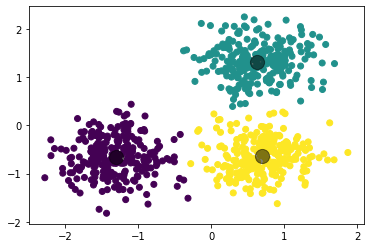

In [27]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)
y_kmeans = kmeans.fit_predict(df)
plt.scatter(df['f1'], df['f2'], c=y_kmeans)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()

### 5. [20 pts] Use DBSCAN clustering to find anomalies.

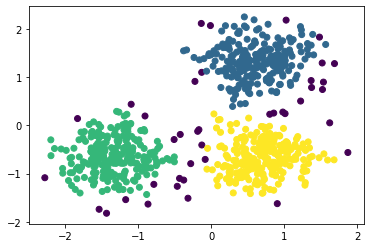

In [39]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
dbscan = DBSCAN(eps=0.2)
clusters = dbscan.fit_predict(X_scaled)
plt.scatter(df['f1'], df['f2'], c=clusters)